# Технологический процесс обогащения золота

# Описание проекта

Необходимо подготовить прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель машинного обучения.

Метрикой качества моделей машинного обучения в проекте будет sMAPE.

# 1. Подготовка данных

Импортируем необходимые библиотеки для работы

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,fbeta_score, make_scorer
# from sklearn.externals.joblib import parallel_backend
from sklearn.metrics import mean_squared_error
sns.set()

Импортируем файлы с данными и запишим их в переменные. Объекты в наборе данных индексируются датой (поле date). Передадим это поле как аргумент параметра index_col.

In [ ]:
df_train = pd.read_csv('gold_recovery_train.csv', index_col = 'date') # обучающая выборка
df_test = pd.read_csv('gold_recovery_test.csv', index_col = 'date') # тестовая выборка
df_full = pd.read_csv('gold_recovery_full.csv', index_col = 'date') # исходные данные

Выведем информацию о таблицах

In [ ]:
print('Информация о таблице Обучающая выборка')
print()
display(df_train.info())
print()
print('Информация о таблице Тестовая выборка')
print()
display(df_test.info())
print()
print('Информация о таблице Исходные данные')
print()
display(df_full.info())
print()

Информация о таблице Обучающая выборка

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.out

None


Информация о таблице Тестовая выборка

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.s

None


Информация о таблице Исходные данные

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.outp

None

Обучающая и полные выборки имеют одинаковое количесво признаков, в тестовой выборке некоторые признаки отсутвуют. Во всех выборках имеются пропуски. Тип данных - с плавающей запятой float64.

In [ ]:
print('Количество пропусков в таблице Обучающая выборка')
print()
print(df_train.isnull().sum())

Количество пропусков в таблице Обучающая выборка

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64


Выведем первые 10 строк каждой таблицы

In [ ]:
print('Данные обучающей выборки')
display(df_train.head(10))
print('Данные тестовой выборки')
display(df_test.head(10))
print('Исходные данные')
display(df_full.head(10))

Данные обучающей выборки


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646,6.733907,2.353017,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,42050.8

Данные тестовой выборки


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

Исходные данные


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646,6.733907,2.353017,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,42050.8

Набор данных содержит атрибуты, описывающие 4 этапа технологического процесса получения золота из руды:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

При этом видим, что данные содержат различное количество пропущенных значений, меняющееся от поля к полю.

## Проверка корректности расчёта эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака

Расчитаем эффективность обогащения золота по формуле

In [ ]:
# Создадим таблицу с данными по содержанию золота на этапах технологического процесса: 
df_train_for_calс = df_train.dropna()

df_train_au = df_train_for_calс[['rougher.output.concentrate_au', 
                        'rougher.input.feed_au', 
                        'rougher.output.tail_au',
                        'rougher.output.recovery']]

# Создадим переменные содержания зоолота во фракциях
с = df_train_au['rougher.output.concentrate_au'] # C — доля золота в концентрате после флотации/очистки;
f = df_train_au['rougher.input.feed_au'] # F — доля золота в сырье/концентрате до флотации/очистки;
t = df_train_au['rougher.output.tail_au'] # T — доля золота в отвальных хвостах после флотации/очистки.

# Расчитаем эффективность обогащения золота по формуле и добавим значения в новый столбец
df_train_au['recovery_calculation'] = (с * (f - t)) / (f * (с - t)) * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Выведем результат на экран

In [ ]:
df_train_au.head(5)

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,recovery_calculation
date,,,,,
2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763,87.107763
2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261,86.843261
2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308,86.842308
2016-01-15 03:00:00,19.320810,6.118189,1.079755,87.226430,87.226430
2016-01-15 04:00:00,19.216101,5.663707,1.012642,86.688794,86.688794


Эффективность обогащения посчитана успешно. 

Следующий этап - понять, насколько расчётное значение этого показателя будет отличаться от исходного. Для этого рассчитаем среднюю абсолютную ошибку - MAE.

В отличие от простой суммы отклонений расчитанного значения от реального, где отрицательные значения были бы компенсированы положительными, MAE считает отклонения по модулю, следовательно, результаты не будут искажены.

In [ ]:
print('МАЕ между расчетными данными и значением признака:', 
      mean_absolute_error(df_train_au['recovery_calculation'], df_train_au['rougher.output.recovery']))


МАЕ между расчетными данными и значением признака: 9.555596961987514e-15


#### Вывод
MAE эффективности обогащения 9.555596961987514e-15 - это весьма малое значение. Это говорит о том, что изначально рассчитанная эффективность обогащения получена верно.

## Анализ разницы в признаках

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [ ]:
print('Количество наблюдений и признаков тестовых данных', df_test.shape)
print('Признаки тестовых данных')
print(df_test.columns)
print()
print('Количество наблюдений и признаков полных данных', df_full.shape)
print('Признаки полных данных')
print(df_full.columns)
print()
print('Количество наблюдений и признаков в тренировочной выборке', df_train.shape)
print('Признаки тренировочных данных')
print(df_train.columns)

Количество наблюдений и признаков тестовых данных (5856, 52)
Признаки тестовых данных
Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.

Выясним, какие признаки из тренировочной выборки не попали в тестовую.

In [ ]:
missing_features = []
for feature in df_train.columns:
    if feature not in df_test.columns:
        missing_features.append(feature)
print('\nКоличество недостающих признаков:', len(missing_features))
print('\nСписок недостающих признаков\n')
display(missing_features)


Количество недостающих признаков: 34

Список недостающих признаков



['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

### Вывод

В тестовой выборке отсутствуют  признаки (их 34 шт), которые относятся к типу параметра "output -Параметры продукта", calculation - "Расчётные характеристики":
- Этап final - финальные характеристики
    - Тип параметра output - параметры продукта: 
                                   'final.output.concentrate_ag', 
                                   'final.output.concentrate_pb',
                                   'final.output.concentrate_sol', 
                                   'final.output.concentrate_au',
                                   'final.output.recovery', 
                                   'final.output.tail_ag', 
                                   'final.output.tail_pb',
                                   'final.output.tail_sol', 
                                   'final.output.tail_au'
- Этап primary_cleaner - первичная очистка:
    - Тип параметра output - параметры продукта: 
                                   'primary_cleaner.output.concentrate_ag',
                                   'primary_cleaner.output.concentrate_pb',
                                   'primary_cleaner.output.concentrate_sol',
                                   'primary_cleaner.output.concentrate_au',
                                   'primary_cleaner.output.tail_ag', 
                                   'primary_cleaner.output.tail_pb',
                                   'primary_cleaner.output.tail_sol', 
                                   'primary_cleaner.output.tail_au',
- Этап rougher - флотация:
    - Тип параметра calculation - расчётные характеристики: 
                                              'rougher.calculation.sulfate_to_au_concentrate',
                                              'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                              'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                              'rougher.calculation.au_pb_ratio'
    - Тип параметра output - параметры продукта: 
                                   'rougher.output.concentrate_ag',
                                   'rougher.output.concentrate_pb', 
                                   'rougher.output.concentrate_sol',
                                   'rougher.output.concentrate_au', 
                                   'rougher.output.recovery',
                                   'rougher.output.tail_ag', 
                                   'rougher.output.tail_pb',
                                   'rougher.output.tail_sol', 
                                   'rougher.output.tail_au' 
- Этап secondary_cleaner - вторичная очистка:
    - Тип параметра output - параметры продукта:
                                    'secondary_cleaner.output.tail_ag', 
                                    'secondary_cleaner.output.tail_pb',
                                    'secondary_cleaner.output.tail_sol', 
                                    'secondary_cleaner.output.tail_au'

## Проведем предобработку данных

Добавим в тестовую выборку целевые признаки, которые надо спрогнозировать: `rougher.output.recovery` `final.output.recovery`

In [ ]:
df_test = df_test.join(df_full[['rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.8659

Заполним пропуски в данных ближайшими значениями

In [ ]:
df_test = df_test.fillna(method = 'ffill')
# df_test = df_test.fillna(df_train.mean())
# df_test = df_test.dropna()
df_train = df_train.fillna(method = 'ffill')
# df_train = df_train.dropna()
print('Проверка Количество пропусков в таблице Тестовая выборка после заполнения пропусков')
print()
print(df_test.isnull().sum())
print('Проверка Количество пропусков в таблице Обучающая выборка после заполнения пропусков')
print()
print(df_train.isnull().sum())

Проверка Количество пропусков в таблице Тестовая выборка после заполнения пропусков

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rou

Проверим данные на дубликаты и удалим их, если они есть

In [ ]:
df_train.duplicated().sum()

21

In [ ]:
df_test.duplicated().sum()

8

In [ ]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

- Дубликаты в выборках успешно удалены.

- Пропуски в данных заполнены по следующему принципу.

По условию проекта объекты в выборках индексируются датами. Соседние по времени параметры часто похожи. Следовательно, мы можем довольно существенно упростить процесс замены пропущенных значений, применив метод fillna и передав его параметру method аргумент ffill. Замена пропущенных значений с помощью метода ffill предполагает замену пропущенных значений на значения ближайших к нему соседей. Этот способ максимально полно соответствует условиям проекта в части схожести соседтствующих по дате параметрам.

#  2.Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [ ]:
print("Концентрация металлов (Au, Ag, Pb) после этапа Флотация")
print(
    df_train[['rougher.output.concentrate_au',
          'rougher.output.concentrate_ag',
          'rougher.output.concentrate_pb']].mean()
)
print()
print("Концентрация металлов (Au, Ag, Pb) после Первого этапа очистки")
print(
df_train[['primary_cleaner.output.concentrate_au',
          'primary_cleaner.output.concentrate_ag',
          'primary_cleaner.output.concentrate_pb']].mean()
)
print()
print("Концентрация металлов (Au, Ag, Pb) Финального концентрата")
print(
df_train[['final.output.concentrate_au', 
          'final.output.concentrate_ag', 
          'final.output.concentrate_pb']].mean()
    )

Концентрация металлов (Au, Ag, Pb) после этапа Флотация
rougher.output.concentrate_au    17.346496
rougher.output.concentrate_ag    10.546595
rougher.output.concentrate_pb     6.860167
dtype: float64

Концентрация металлов (Au, Ag, Pb) после Первого этапа очистки
primary_cleaner.output.concentrate_au    29.067640
primary_cleaner.output.concentrate_ag     7.397347
primary_cleaner.output.concentrate_pb     8.501826
dtype: float64

Концентрация металлов (Au, Ag, Pb) Финального концентрата
final.output.concentrate_au    39.340135
final.output.concentrate_ag     4.701874
final.output.concentrate_pb     9.083562
dtype: float64


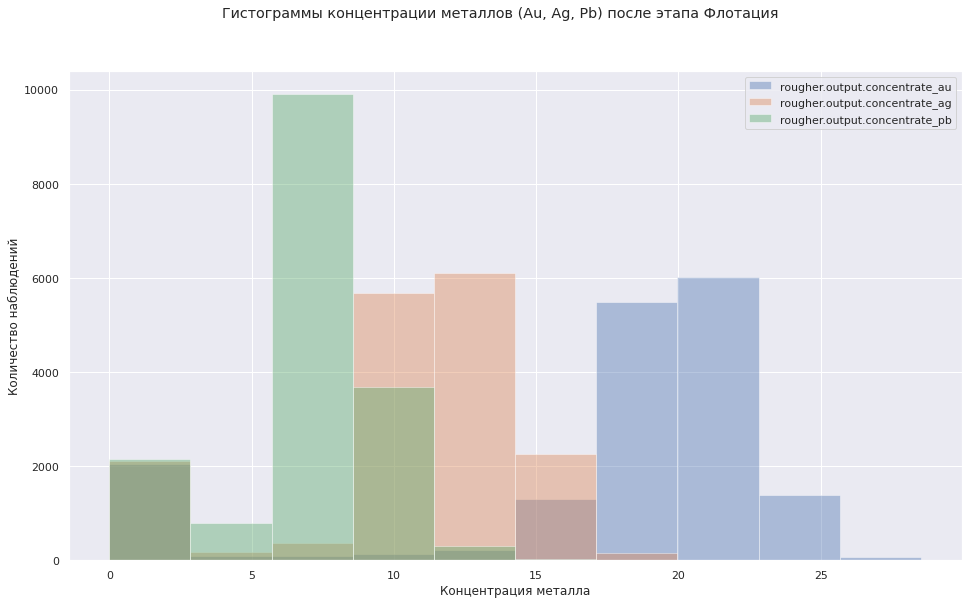

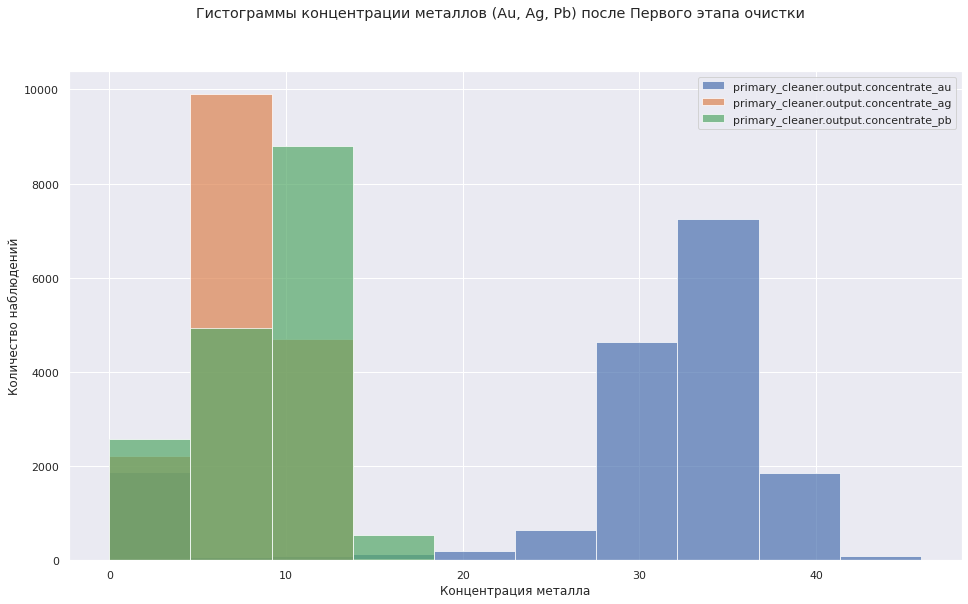

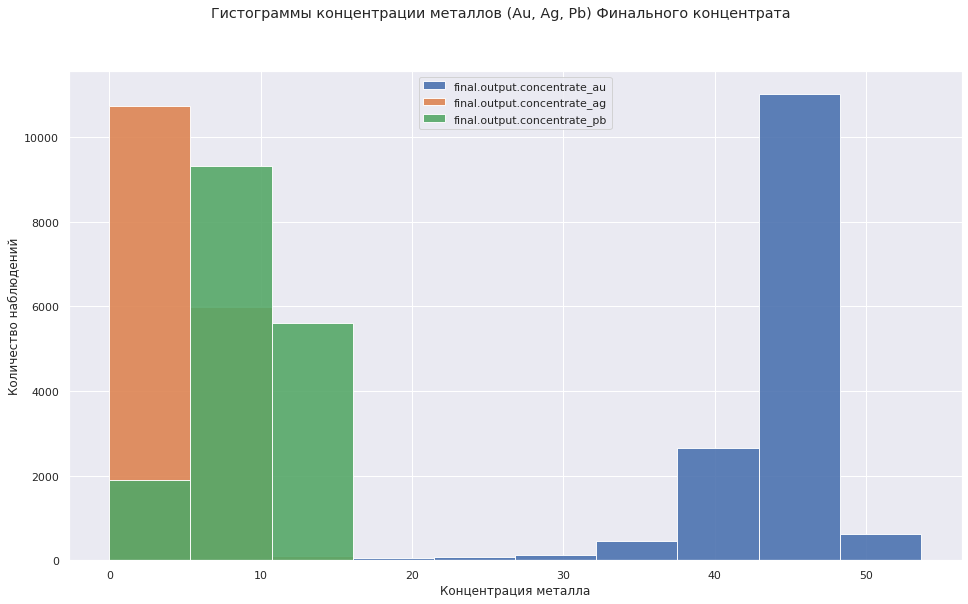

In [ ]:
df_train[['rougher.output.concentrate_au',
          'rougher.output.concentrate_ag',
          'rougher.output.concentrate_pb']].plot(kind = 'hist', figsize = (16, 9), alpha = 0.4)
plt.suptitle("Гистограммы концентрации металлов (Au, Ag, Pb) после этапа Флотация")
plt.xlabel("Концентрация металла")
plt.ylabel("Количество наблюдений")
plt.show()
df_train[['primary_cleaner.output.concentrate_au',
          'primary_cleaner.output.concentrate_ag',
          'primary_cleaner.output.concentrate_pb']].plot(kind = 'hist', figsize = (16, 9), alpha = 0.7)
plt.suptitle("Гистограммы концентрации металлов (Au, Ag, Pb) после Первого этапа очистки")
plt.xlabel("Концентрация металла")
plt.ylabel("Количество наблюдений")
plt.show()

df_train[['final.output.concentrate_au', 
          'final.output.concentrate_ag', 
          'final.output.concentrate_pb']].plot(kind = 'hist', figsize = (16, 9), alpha = 0.9)
plt.suptitle("Гистограммы концентрации металлов (Au, Ag, Pb) Финального концентрата")
plt.xlabel("Концентрация металла")
plt.ylabel("Количество наблюдений")
plt.show()

### Вывод:

Концентрация металлов в процессе очистки изменяется:
 - Концентрация золота повышается
 - Концентрация серебра снижается
 - Концентрация свинца повышается

Так же заметно разделение золота от других металлов 

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

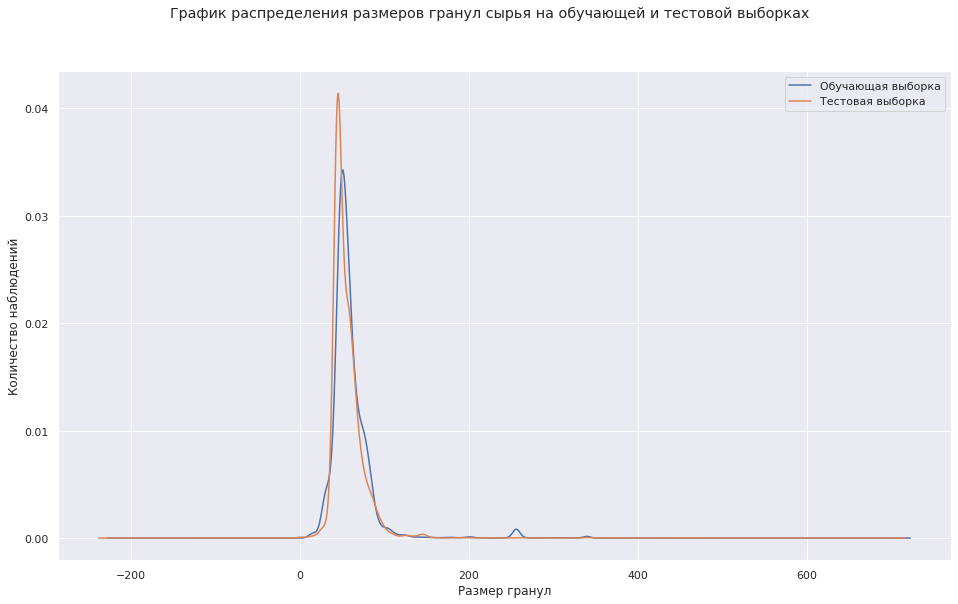

In [ ]:
df_train['rougher.input.feed_size'].plot.kde(legend = True, label = 'Обучающая выборка', figsize = (16, 9))
df_test['rougher.input.feed_size'].plot.kde(legend = True, label = 'Тестовая выборка', figsize = (16, 9))
plt.suptitle("График распределения размеров гранул сырья на обучающей и тестовой выборках")
plt.xlabel("Размер гранул")
plt.ylabel("Количество наблюдений")
plt.show()

### Вывод
Из графика видно, что на обучающей и тестовой выборках размер гранул на входе этапа флотации можно считать одинаковым

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок?

Концентрация веществ в исходном сырье

In [ ]:
df_train[['rougher.input.feed_au',
          'rougher.input.feed_ag', 
          'rougher.input.feed_pb',
          'rougher.input.feed_sol']].sum()

rougher.input.feed_au     120360.371654
rougher.input.feed_ag     131465.499174
rougher.input.feed_pb      53714.810976
rougher.input.feed_sol    544492.038104
dtype: float64

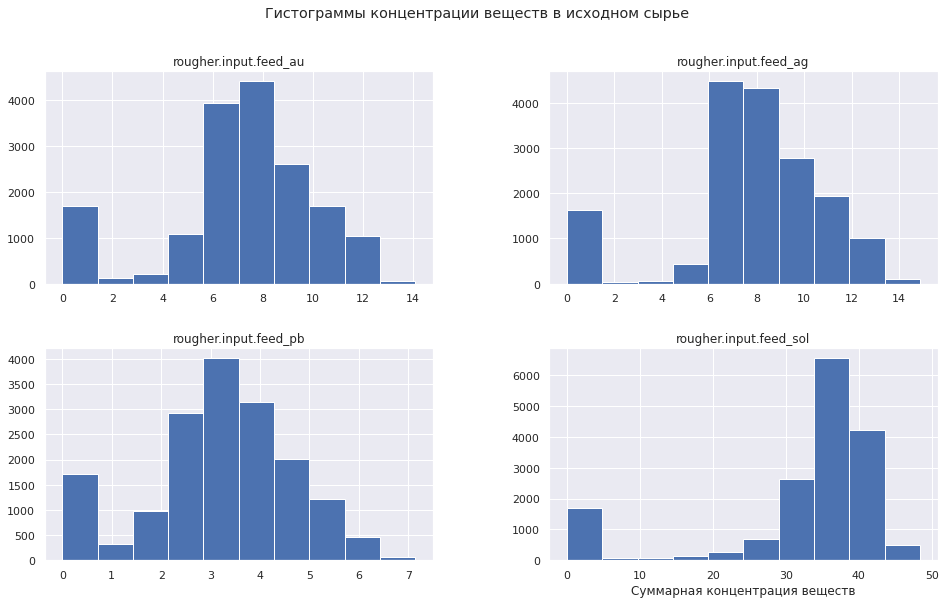

In [ ]:
df_train[['rougher.input.feed_au',
          'rougher.input.feed_ag', 
          'rougher.input.feed_pb',
          'rougher.input.feed_sol']].hist(figsize = (16, 9))
plt.suptitle("Гистограммы концентрации веществ в исходном сырье")
plt.xlabel("Суммарная концентрация веществ")
# plt.ylabel("Y")
plt.show()

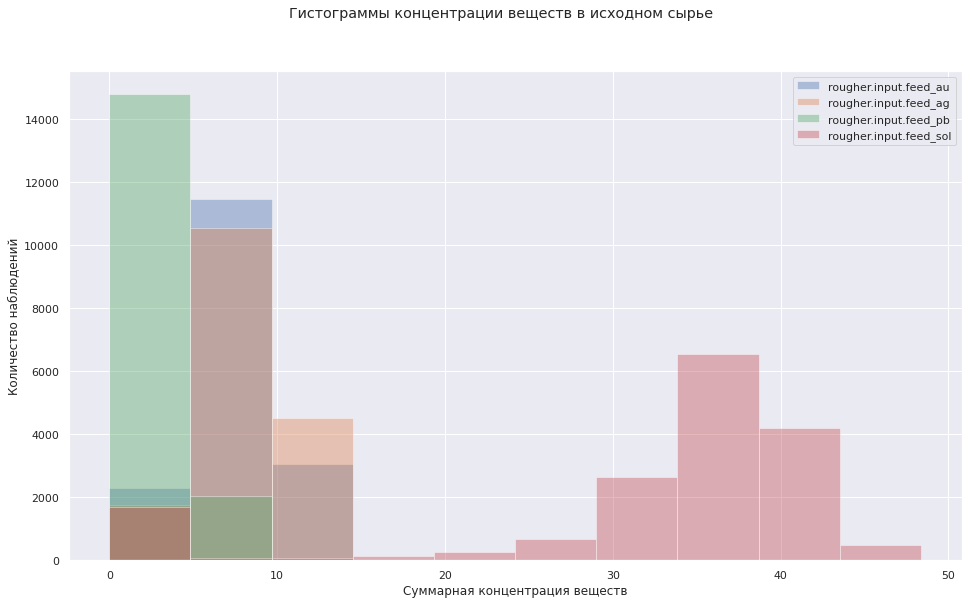

In [ ]:
df_train[['rougher.input.feed_au',
          'rougher.input.feed_ag', 
          'rougher.input.feed_pb',
          'rougher.input.feed_sol']].plot(kind = 'hist', figsize = (16, 9), alpha = 0.4)
plt.suptitle("Гистограммы концентрации веществ в исходном сырье")
plt.xlabel("Суммарная концентрация веществ")
plt.ylabel("Количество наблюдений")
plt.show()

Концентрация веществ в черновом концентрате

In [ ]:
df_train[['rougher.output.concentrate_au',
          'rougher.output.concentrate_ag',
          'rougher.output.concentrate_pb',
          'rougher.output.concentrate_sol']].sum()

rougher.output.concentrate_au     292097.642620
rougher.output.concentrate_ag     177594.115560
rougher.output.concentrate_pb     115518.348595
rougher.output.concentrate_sol    424916.094179
dtype: float64

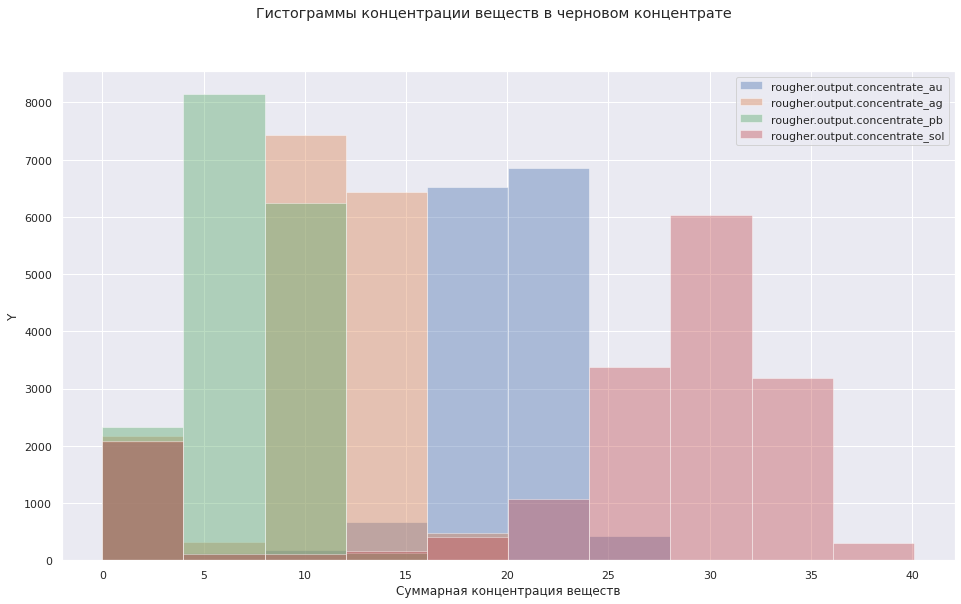

In [ ]:
df_train[['rougher.output.concentrate_au',
          'rougher.output.concentrate_ag',
          'rougher.output.concentrate_pb',
          'rougher.output.concentrate_sol']].plot(kind = 'hist', figsize = (16, 9), alpha = 0.4)
plt.suptitle("Гистограммы концентрации веществ в черновом концентрате")
plt.xlabel("Суммарная концентрация веществ")
plt.ylabel("Y")
plt.show()

Концентрация веществ в финальном концентрате

In [ ]:
df_train[['final.output.concentrate_au', 
          'final.output.concentrate_ag', 
          'final.output.concentrate_pb',
          'final.output.concentrate_sol']].sum()

final.output.concentrate_au     662448.537494
final.output.concentrate_ag      79174.849238
final.output.concentrate_pb     152958.108535
final.output.concentrate_sol    137588.089211
dtype: float64

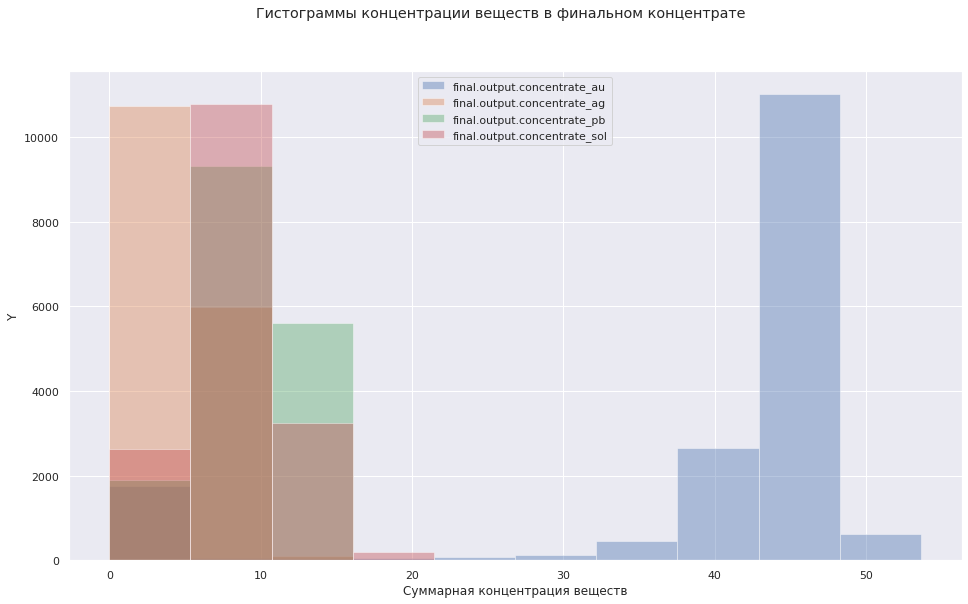

In [ ]:
df_train[['final.output.concentrate_au', 
          'final.output.concentrate_ag', 
          'final.output.concentrate_pb',
          'final.output.concentrate_sol']].plot(kind = 'hist', figsize = (16, 9), alpha = 0.4)
plt.suptitle("Гистограммы концентрации веществ в финальном концентрате")
plt.xlabel("Суммарная концентрация веществ")
plt.ylabel("Y")
plt.show()

### Вывод
На всех стадиях очистки имеются нулевые значения концентрации веществ - похоже на аномалии, так как не может быть нулевая концентрация веществ в какой-либо стадии технологического процесса.

Отфильтруем нулевые значения

In [ ]:
df_train = df_train.loc[df_train['rougher.input.feed_au'] > 0.1]
df_test = df_test.loc[df_test['rougher.input.feed_au'] > 0.1]

Проверим корректность фильтрации нулевых значений

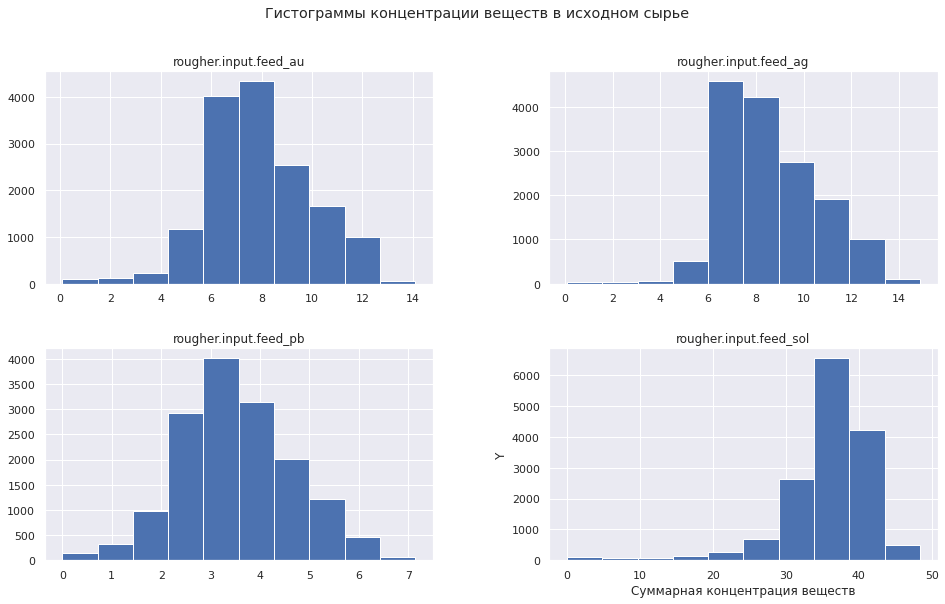

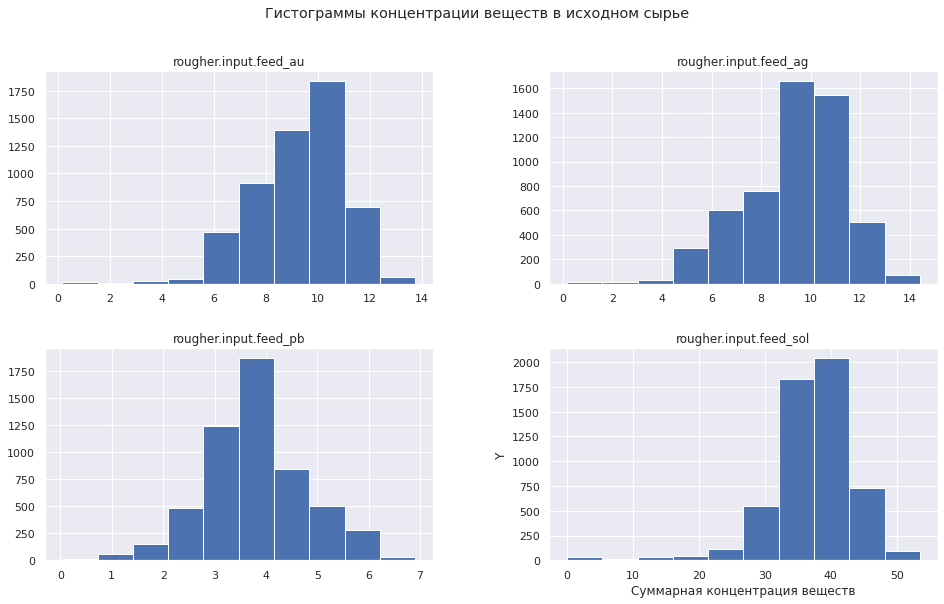

In [ ]:
df_train[['rougher.input.feed_au',
          'rougher.input.feed_ag', 
          'rougher.input.feed_pb',
          'rougher.input.feed_sol']].hist(figsize = (16, 9))
plt.suptitle("Гистограммы концентрации веществ в исходном сырье")
plt.xlabel("Суммарная концентрация веществ")
plt.ylabel("Y")
plt.show()
df_test[['rougher.input.feed_au',
          'rougher.input.feed_ag', 
          'rougher.input.feed_pb',
          'rougher.input.feed_sol']].hist(figsize = (16, 9))
plt.suptitle("Гистограммы концентрации веществ в исходном сырье")
plt.xlabel("Суммарная концентрация веществ")
plt.ylabel("Y")
plt.show()

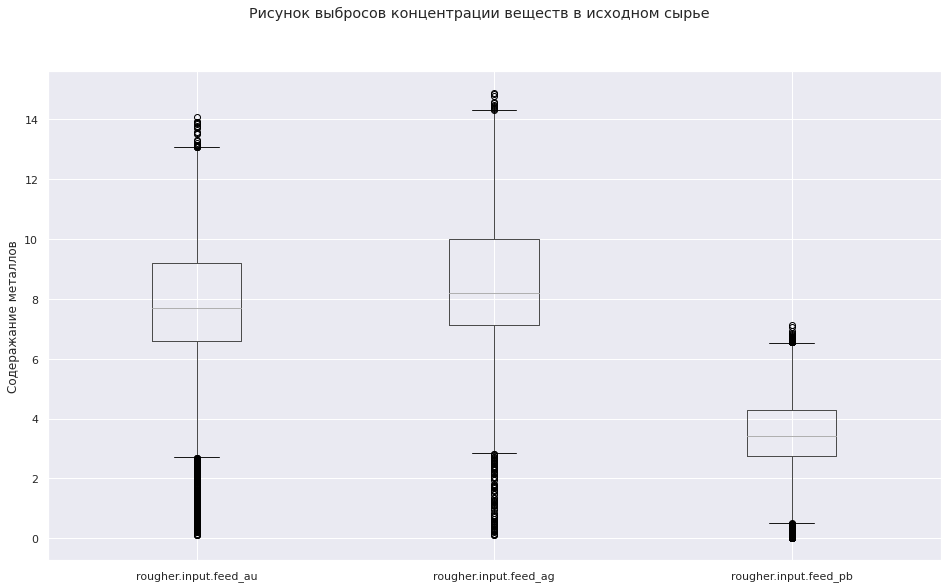

In [ ]:
df_train[['rougher.input.feed_au',
          'rougher.input.feed_ag', 
          'rougher.input.feed_pb',
#           'rougher.input.feed_sol'
         ]].boxplot(figsize = (16, 9))
plt.suptitle("Рисунок выбросов концентрации веществ в исходном сырье")
plt.ylabel("Содеражание металлов")
plt.show()

В данных есть выбросы. Смотреть на них можно с разных сторон. 
Возможно это ошибки измерений, а возможно это реальные данные, так как руда неодородна и в одном плате минимальное сожержание золота, а в следуюшем могут встретиться куски золота,  как было на Аляске. Считаем выбросы надо оставить. 

# 3 Модель

Напишем фунцию для вычисления sMAPE

In [ ]:
def sMAPE(y_true, y_pred):
    """Функция на вход принимает вектор истинных и предсказанных значений и вычисляет метрику sMAPE"""
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

Напишем функцию вычисления Итоговой sMAPE

In [ ]:
def func_total_sMAPE(sMAPE_rougher, sMAPE_final):
    total_sMAPE = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    return total_sMAPE

Создадим скор

Чтобы у нас была возможность использовать функцию в качестве скора, нужно собрать скор, используя функцию make_scorer. Передадим greater_is_better в качестве одного из параметров функции, присвоив ему значение True.

Это необходимо для минимизации значения метрики sMAPE, так как GridSearchCV оптимизирует функцию в сторону максимума. А чтобы найти минимум, нужно максимизировать отрицательное значение. За это отвечает параметр greater_is_better.

In [ ]:
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)

Удалим в обучающей выборке признаки, которых нет в тестовой выборке

In [ ]:
df_train = df_train.drop(['final.output.concentrate_ag', 
                         'final.output.concentrate_pb',
                         'final.output.concentrate_sol', 
                         'final.output.concentrate_au',
                         'final.output.tail_ag', 
                         'final.output.tail_pb',
                         'final.output.tail_sol', 
                         'final.output.tail_au',
                         'primary_cleaner.output.concentrate_ag',
                         'primary_cleaner.output.concentrate_pb',
                         'primary_cleaner.output.concentrate_sol',
                         'primary_cleaner.output.concentrate_au',
                         'primary_cleaner.output.tail_ag', 
                         'primary_cleaner.output.tail_pb',
                         'primary_cleaner.output.tail_sol', 
                         'primary_cleaner.output.tail_au',
                         'rougher.calculation.sulfate_to_au_concentrate',
                         'rougher.calculation.floatbank10_sulfate_to_au_feed',
                         'rougher.calculation.floatbank11_sulfate_to_au_feed',
                         'rougher.calculation.au_pb_ratio',
                         'rougher.output.concentrate_ag',
                         'rougher.output.concentrate_pb', 
                         'rougher.output.concentrate_sol',
                         'rougher.output.concentrate_au',
                         'rougher.output.tail_ag', 
                         'rougher.output.tail_pb',
                         'rougher.output.tail_sol', 
                         'rougher.output.tail_au',
                         'secondary_cleaner.output.tail_ag', 
                         'secondary_cleaner.output.tail_pb',
                         'secondary_cleaner.output.tail_sol', 
                         'secondary_cleaner.output.tail_au'], axis = 1)
df_train = df_train.fillna(method = 'ffill')
df_train.shape

(15259, 54)

In [ ]:
df_train = df_train.drop(['rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'], axis = 1)
df_train = df_train.fillna(method = 'ffill')
df_train.shape

(15259, 24)

In [ ]:
df_test = df_test.drop(['rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'], axis = 1)
df_test = df_test.fillna(method = 'ffill')
df_test.shape

(5479, 24)

In [ ]:
df_train.describe()

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery
count,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000,15259.000000
mean,66.285227,131.420640,8.778760,7.308269,0.873257,1605.699586,-488.640812,1606.590787,-489.143380,1606.671985,-489.576626,1547.645989,-483.323343,8.615358,3.519963,464.963783,61.085728,35.683085,7.887584,11.548042,5.764296,11.201638,5.668443,82.089920
std,11.609208,42.887722,3.541560,0.616397,0.388176,137.691908,37.539873,140.231973,35.718760,143.560244,37.762165,292.811730,49.551919,2.022360,1.141586,113.377259,27.425974,6.210554,2.063153,3.495147,1.255731,3.901398,1.516411,15.888915
min,0.000000,0.000075,0.000000,1.080000,0.000005,0.000000,-798.641662,0.000000,-799.989848,0.000000,-799.971654,0.000000,-799.807838,0.093195,0.000000,0.002413,9.659576,0.000000,0.101614,0.001083,0.000368,0.000086,0.000024,0.000000
25%,62.296538,104.555603,6.020172,6.940000,0.598593,1570.518652,-500.294837,1551.488928,-500.381399,1548.564953,-500.613682,1457.143355,-500.463913,7.133022,2.760865,404.387156,48.664806,33.667821,6.590272,9.608658,5.007310,9.317548,5.000465,79.801423
50%,67.421353,132.459561,8.026578,7.288500,0.883991,1601.742259,-499.905771,1601.697155,-499.935151,1601.457766,-499.865731,1600.184557,-499.825307,8.201642,3.428613,497.911716,55.196684,36.808874,7.685629,11.497045,5.897576,11.072617,5.902570,85.227083
75%,72.468003,160.013366,11.522191,7.690000,1.100783,1699.667356,-499.353635,1700.200076,-499.374991,1700.453840,-498.743119,1699.442949,-498.377195,10.004922,4.272579,545.099521,66.410117,39.318647,9.184299,13.495057,6.599244,13.273688,6.604450,90.129237
max,100.000000,251.999948,40.000000,10.470000,2.514338,2079.531340,-330.134203,2114.906758,-336.237097,2016.088372,-287.422839,2398.903635,-30.601828,14.869652,7.142594,717.508837,484.967466,48.363177,14.093363,36.118275,16.260770,37.980648,9.698407,100.000000


Обучим разные модели и оценим их качество кросс-валидацией. Выберим лучшую модель и проверим её на тестовой выборке

## 3.1. Спрогнозируем эффективность обогащения чернового концентрата `rougher.output.recovery`

Разделим обучающую выборку на целевой признак и признаки

In [ ]:
target = df_train['rougher.output.recovery'] # Целевой признак
features = df_train.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis = 1) # Признаки


# Разделим выборку датасет train на тренировочную и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)

# проверим корректность разделения
print('Размер выборки до разделения на целевой признак и признаки', df_train.shape)
print('Размер таблицы целевого признака', target_train.shape)
print('Размер таблицы признаков', features_train.shape)
print('Размер таблицы целевого признака валидация', target_valid.shape)
print('Размер таблицы признаков валидации', features_valid.shape)

Размер выборки до разделения на целевой признак и признаки (15259, 24)
Размер таблицы целевого признака (11444,)
Размер таблицы признаков (11444, 22)
Размер таблицы целевого признака валидация (3815,)
Размер таблицы признаков валидации (3815, 22)


### 3.1.1. DecisionTreeRegressor: Подберем гиперпараметры для модели Решающее дерево для регрессии `rougher.output.recovery`

In [ ]:
%%time

model = DecisionTreeRegressor(random_state=12345)

parameter_grid = { 
'splitter': ['best', 'random'],
'max_depth': [i for i in range(1, 51, 1)],
'criterion': ['mse', 'mae'],
'max_features': ['auto'],
'min_samples_split': [round(i, 1) for i in np.linspace(0.1, 1.0, 10)],
'min_samples_leaf': [i for i in range(1, 16, 1)]
}

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, verbose=10, n_jobs=-1)
grid.fit(features_train, target_train)


# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search ")
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=1, min_samples_split=0.1, random_state=12345)

 The best score sMAPE_rougher across ALL searched params:
 13.3415

 The best parameters across ALL searched params:
 {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 0.1}

 ========================================================

CPU times: user 7min 5s, sys: 14.4 s, total: 7min 20s
Wall time: 35min 54s

### 3.1.2. RandomForestRegressor: Подберем гиперпараметры для модели Случайный лес для регрессии `rougher.output.recovery`

In [ ]:
%%time

model = RandomForestRegressor(random_state=12345, verbose=10)

parameter_grid = { 
'n_estimators': [i for i in range(1, 51, 5)],
'max_depth': [i for i in range(1, 51, 5)],
'criterion': ['mse', 'mae'],
'max_features': ['auto'],
'min_samples_split': [round(i, 1) for i in np.linspace(0.1, 1.0, 10)],
'min_samples_leaf': [i for i in range(1, 15, 5)]
}

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, n_jobs=-1)

grid.fit(features_train, target_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=1, n_estimators=11, random_state=12345)

 The best score sMAPE_rougher across ALL searched params:
 13.257

 The best parameters across ALL searched params:
 {'n_estimators': 11, 'max_depth': 1}

 ========================================================
 
CPU times: user 23.1 s, sys: 2.17 s, total: 25.3 s
Wall time: 51min 40s

### 3.1.3. LinearRegression: Подберем гиперпараметры для модели Линейная регрессия `rougher.output.recovery`

In [ ]:
%%time
model = LinearRegression()
parameter_grid = {'fit_intercept': [True, False], 
'normalize': [True, False], 
'copy_X': [True, False]
}

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, verbose=10, n_jobs=-1)

grid.fit(features_train, target_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

Results from Grid Search 


 The best estimator across ALL searched params:
 LinearRegression(fit_intercept=False, normalize=True)

 The best score sMAPE_rougher across ALL searched params:
 12.2913

 The best parameters across ALL searched params:
 {'normalize': True, 'fit_intercept': False, 'copy_X': True}

 ========================================================
CPU times: user 683 ms, sys: 51.2 ms, total: 734 ms
Wall time: 2.48 s

### 3.1.4. LGBMRegressor: Подберем гиперпараметры для модели Light Gradient Boosting Machine `rougher.output.recovery`

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
%%time
model = LGBMRegressor(
    random_state = 12345, 
    device = 'gpu'
    )

parameter_grid = {
            'num_leaves': [32, 64],
            'max_depth': [-1, 10, 50],
            'n_estimators': [1000, 1500, 2000],
            'learning_rate' : [0.01, 0.001]
                  }
                  

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, verbose=10, n_jobs=-1)
grid.fit(features_train, target_train)
 
# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

 Results from Grid Search 


 The best estimator across ALL searched params:
 LGBMRegressor(learning_rate=0.001, n_estimators=1000, random_state=12345)

 The best score sMAPE_rougher across ALL searched params:
 11.6851

 The best parameters across ALL searched params:
 {'learning_rate': 0.001, 'n_estimators': 1000}

 ========================================================
 
CPU times: user 12.8 s, sys: 324 ms, total: 13.1 s
Wall time: 3min 45s

### 3.1.5. CatBoostRegressor: Подберем гиперпараметры для модели `rougher.output.recovery`

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
%%time
model = CatBoostRegressor(verbose = False,
                        task_type= 'GPU',
                        random_state = 12345,
                        )


parameter_grid = {
          'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[1000, 1500, 3000],
          'learning_rate':[0.001, 0.01, 0.1], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':[4]
          }

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, cv = 5)

grid.fit(features_train, target_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

 Results from Grid Search 


 The best estimator across ALL searched params:
 <catboost.core.CatBoostRegressor object at 0x7fbaebf87b10>

 The best score sMAPE_rougher across ALL searched params:
 12.0897

 The best parameters across ALL searched params:
 {'iterations': 1000, 'learning_rate': 0.001}

 ========================================================
CPU times: user 6min 11s, sys: 8.17 s, total: 6min 19s
Wall time: 3min 16s

### 3.1.6. Подберем лучшую модель для прогноза обогащения чернового концентрата `rougher.output.recovery`



In [ ]:
%%time

# DecisionTreeRegressor

print('=====================================================================================')
print('Расчеты на модели DecisionTreeRegressor - Дерево решений для регрессии на черновом концентрате')

model_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=630, max_features='auto',
                      min_samples_leaf=11, min_samples_split=0.9,
                      random_state=12345)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_tree, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели DecisionTreeRegressor by cross_val_score: {round(score, 4)}')

# Fit - predict
model_tree.fit(features_train, target_train)
predictions_rougher = model_tree.predict(features_valid)
sMAPE_rougher = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели DecisionTreeRegressor by fit-predict: {round(sMAPE_rougher, 4)}')
print('=====================================================================================')


# RandomForestRegressor

print('Расчеты на модели RandomForestRegressor - Случаный лес для регрессии на черновом концентрате')
model_forest = RandomForestRegressor(max_depth=1, n_estimators=11, random_state=12345)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_forest, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели RandomForestRegressor by cross_val_score: {round(score, 4)}')

# Fit - predict
model_forest.fit(features_train, target_train)
predictions_rougher = model_forest.predict(features_valid)
sMAPE_rougher = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели RandomForestRegressor by fit-predict: {round(sMAPE_rougher, 4)}')
print('=====================================================================================')


# LinearRegression

print('Расчеты на модели LinearRegression - Линейная регрессия на черновом концентрате')

model_linear = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_linear, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели LinearRegression by cross_val_score: {round(score, 4)}')

# Fit - predict
model_linear.fit(features_train, target_train)
predictions_rougher = model_linear.predict(features_valid)
sMAPE_rougher = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели LinearRegression by fit-predict: {round(sMAPE_rougher, 4)}')
print('=====================================================================================')


# LGBMRegressor

print('Расчеты на модели LGBMRegressor на черновом концентрате')

model_LGBMRegressor = LGBMRegressor(learning_rate=0.001, n_estimators=1000, random_state=12345)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_LGBMRegressor, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели LinearRegression by cross_val_score: {round(score, 4)}')

# Fit - predict
model_LGBMRegressor.fit(features_train, target_train)
predictions_rougher = model_LGBMRegressor.predict(features_valid)
sMAPE_rougher = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели LGBMRegressor by fit-predict: {round(sMAPE_rougher, 4)}')
print('=====================================================================================')


# CatBoostRegressor

print('Расчеты на модели CatBoostRegressor на черновом концентрате')

model_CatBoostRegressor = CatBoostRegressor(verbose = False, 
                                            iterations = 1000, 
                                            learning_rate = 0.001, 
                                            task_type= 'GPU'
                                            )

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_CatBoostRegressor, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели CatBoostRegressor by cross_val_score: {round(score, 4)}')

# Fit - predict
model_CatBoostRegressor.fit(features_train, target_train)
predictions_rougher = model_CatBoostRegressor.predict(features_valid)
sMAPE_rougher = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели CatBoostRegressor by fit-predict: {round(sMAPE_rougher, 4)}')
print('=====================================================================================')

Расчеты на модели DecisionTreeRegressor - Дерево решений для регрессии на черновом концентрате
Метрика sMAPE на модели DecisionTreeRegressor by cross_val_score: 14.6135
Метрика sMAPE на модели DecisionTreeRegressor by fit-predict: 12.5093
Расчеты на модели RandomForestRegressor - Случаный лес для регрессии на черновом концентрате
Метрика sMAPE на модели RandomForestRegressor by cross_val_score: 14.3457
Метрика sMAPE на модели RandomForestRegressor by fit-predict: 12.4259
Расчеты на модели LinearRegression - Линейная регрессия на черновом концентрате
Метрика sMAPE на модели LinearRegression by cross_val_score: 13.5618
Метрика sMAPE на модели LinearRegression by fit-predict: 11.3892
Расчеты на модели LGBMRegressor на черновом концентрате
Метрика sMAPE на модели LinearRegression by cross_val_score: 13.6418
Метрика sMAPE на модели LGBMRegressor by fit-predict: 10.7427
Расчеты на модели CatBoostRegressor на черновом концентрате
Метрика sMAPE на модели CatBoostRegressor by cross_val_score: 1

**Лучшая модель - CatBoostRegressor**

Подготовим признаки для обучения лучшей модели: таргет `rougher.output.recovery`

In [ ]:
target_test = df_test['rougher.output.recovery'] # Целевой признак
features_test = df_test.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis = 1) # Признаки

target_train = df_train['rougher.output.recovery'] # Целевой признак
features_train = df_train.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis = 1) # Признаки
print('Размер target_test_rougher', target_test.shape)
print('Размер features_test_rougher', features_test.shape)
print('Размер target_train_rougher', target_train.shape)
print('Размер features_train_rougher', features_train.shape)

Размер target_test_rougher (5479,)
Размер features_test_rougher (5479, 22)
Размер target_train_rougher (15259,)
Размер features_train_rougher (15259, 22)


Переобучим модель на полных обучающих данных и предскажем на тестовых данных

In [ ]:
%%time
model_CatBoostRegressor.fit(features_train, target_train)

CPU times: user 16.4 s, sys: 268 ms, total: 16.7 s
Wall time: 8.59 s


### 3.1.7. Сделаем предсказания на тестовых признаках и вычислим метрику sMAPE `rougher.output.recovery`

In [ ]:
predicted_test = model_CatBoostRegressor.predict(features_test)
sMAPE_rougher = sMAPE(target_test, predicted_test)
print('Метрика sMAPE_rougher:' , sMAPE_rougher)

Метрика sMAPE_rougher: 10.192011035936488


Метрика sMAPE_rougher: 10.19 (model_CatBoostRegressor)

In [ ]:
predicted_rougher_constant = pd.Series(target_train.median(), index = target_test.index)
sMAPE_rougher_constant = sMAPE(target_test, predicted_rougher_constant)
print('Константная модель Метрика sMAPE rougher:', sMAPE_rougher_constant)

Константная модель Метрика sMAPE rougher: 9.26240375888358


### Вывод `rougher.output.recovery`
Качество модели немного хуже, чем метрика константной модели

## 3.2. Спрогнозируем эффективность обогащения финального концентрата `final.output.recovery`

Разделим обучающую выборку на целевой признак и признаки

In [ ]:
target = df_train['final.output.recovery'] # Целевой признак
features = df_train.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis = 1) # Признаки


# Разделим выборку датасет train на тренировочную и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)

# проверим корректность разделения
print('Размер выборки до разделения на целевой признак и признаки', df_train.shape)
print('Размер таблицы целевого признака', target_train.shape)
print('Размер таблицы признаков', features_train.shape)
print('Размер таблицы целевого признака валидация', target_valid.shape)
print('Размер таблицы признаков валидации', features_valid.shape)

Размер выборки до разделения на целевой признак и признаки (15259, 24)
Размер таблицы целевого признака (11444,)
Размер таблицы признаков (11444, 22)
Размер таблицы целевого признака валидация (3815,)
Размер таблицы признаков валидации (3815, 22)


Подберем гиперпараметры для моделей

### 3.2.1. DecisionTreeRegressor: Подберем гиперпараметры для модели Решающее дерево для регрессии `final.output.recovery`

In [ ]:
%%time

model = DecisionTreeRegressor(random_state=12345)

parameter_grid = { 
'splitter': ['best', 'random'],
'max_depth': [i for i in range(10, 1001, 10)],
'criterion': ['mse', 'mae'],
'max_features': ['auto'],
'min_samples_split': [round(i, 1) for i in np.linspace(0.1, 1.0, 10)],
'min_samples_leaf': [i for i in range(1, 16, 5)]
}

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, verbose=10, n_jobs=-1)
grid.fit(features_train, target_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search ")
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

Results from Grid Search 


 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
                      min_samples_leaf=6, min_samples_split=1.0,
                      random_state=12345)

 The best score sMAPE_rougher across ALL searched params:
 11.7539

 The best parameters across ALL searched params:
 {'splitter': 'best', 'min_samples_split': 1.0, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'mse'}

 ========================================================
 
CPU times: user 11.5 s, sys: 974 ms, total: 12.4 s
Wall time: 14min 34s

### 3.2.2. RandomForestRegressor: Подберем гиперпараметры для модели Случайный лес для регрессии `final.output.recovery`

In [ ]:
%%time

model = RandomForestRegressor(random_state=12345)

parameter_grid = { 
'n_estimators': [i for i in range(1, 150, 10)],
'max_depth': [i for i in range(1, 51, 10)],
'criterion': ['mse', 'mae'],
'max_features': ['auto'],
'min_samples_split': [round(i, 1) for i in np.linspace(0.1, 1.0, 10)],
'min_samples_leaf': [i for i in range(1, 15, 5)]
}

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, verbose=10, n_jobs=-1)

grid.fit(features_train, target_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search ")
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=41, n_estimators=1, random_state=12345)

 The best score sMAPE_rougher across ALL searched params:
 12.1015

 The best parameters across ALL searched params:
 {'n_estimators': 1, 'max_depth': 41}

 ========================================================
CPU times: user 17.4 s, sys: 1.99 s, total: 19.4 s
Wall time: 49min 53s

### 3.2.3. LinearRegression: Подберем гиперпараметры для модели Линейная регрессия `final.output.recovery`

In [ ]:
%%time
model = LinearRegression()
parameter_grid = {'fit_intercept': [True, False], 
'normalize': [True, False], 
'copy_X': [True, False]
}

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, verbose=10, n_jobs=-1)

grid.fit(features_train, target_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search ")
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

Results from Grid Search 


 The best estimator across ALL searched params:
 LinearRegression(fit_intercept=False, normalize=True)

 The best score sMAPE_rougher across ALL searched params:
 10.8191

 The best parameters across ALL searched params:
 {'normalize': True, 'fit_intercept': False, 'copy_X': True}

 ========================================================
CPU times: user 522 ms, sys: 77.3 ms, total: 599 ms
Wall time: 2.43 s

### 3.2.4. LGBMRegressor: Подберем гиперпараметры для модели Light Gradient Boosting Machine `final.output.recovery`

In [ ]:
%%time
model = LGBMRegressor(
    random_state = 12345, 
    device = 'gpu'
    )

parameter_grid = {
            'num_leaves': [32, 64],
            'max_depth': [-1, 10, 50],
            'n_estimators': [1000, 3000, 5000, 10000],
            'learning_rate' : [0.1, 0.01, 0.001]
                  }
                  
grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, n_jobs=-1)
grid.fit(features_train, target_train)
 
# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search ")
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMRegressor(learning_rate=0.001, n_estimators=1000, random_state=12345)

 The best score sMAPE_rougher across ALL searched params:
 10.1726

 The best parameters across ALL searched params:
 {'learning_rate': 0.001, 'n_estimators': 1000}

 ========================================================
CPU times: user 16.1 s, sys: 1.08 s, total: 17.2 s
Wall time: 17min 48s

### 3.2.5. CatBoostRegressor: Подберем гиперпараметры для модели `final.output.recovery`

In [ ]:
%%time
model = CatBoostRegressor(
                        task_type= 'GPU',
                        random_state = 12345, 
                        verbose = False
                        )

parameter_grid = {
          'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[1000, 1500, 3000],
          'learning_rate':[0.001, 0.01, 0.1], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':[4]
          }

grid = GridSearchCV(model, parameter_grid, scoring = score_sMAPE, cv = 5)
grid.fit(features_train, target_train)
 
# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search ")
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score sMAPE_rougher across ALL searched params:\n",
          round(grid.best_score_, 4))
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")

Results from Grid Search 

 The best estimator across ALL searched params:
 <catboost.core.CatBoostRegressor object at 0x7fbb0542ee50>

 The best score sMAPE_rougher across ALL searched params:
 10.4525

 The best parameters across ALL searched params:
 {'iterations': 1000, 'learning_rate': 0.001}

 ========================================================
 
CPU times: user 20min 5s, sys: 26.6 s, total: 20min 31s
Wall time: 10min 37s

### 3.2.6. Подберем лучшую модель для прогноза обогащения финального концентрата `final.output.recovery`



In [ ]:
%%time

# DecisionTreeRegressor

print('=====================================================================================')
print('Расчеты на модели DecisionTreeRegressor - Дерево решений для регрессии на финальном концентрате')

model_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=10, max_features='auto',
                      min_samples_leaf=6, min_samples_split=1.0,
                      random_state=12345)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_tree, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели DecisionTreeRegressor by cross_val_score: {round(score, 4)}')

# Fit - predict
model_tree.fit(features_train, target_train)
predictions_rougher = model_tree.predict(features_valid)
sMAPE_final = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели DecisionTreeRegressor by fit-predict: {round(sMAPE_final, 4)}')
print('=====================================================================================')


# RandomForestRegressor

print('Расчеты на модели RandomForestRegressor - Случаный лес для регрессии на финальном концентрате')
model_forest = RandomForestRegressor(max_depth=41, n_estimators=1, random_state=12345)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_forest, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели RandomForestRegressor by cross_val_score: {round(score, 4)}')

# Fit - predict
model_forest.fit(features_train, target_train)
predictions_rougher = model_forest.predict(features_valid)
sMAPE_final = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели RandomForestRegressor by fit-predict: {round(sMAPE_final, 4)}')
print('=====================================================================================')


# LinearRegression

print('Расчеты на модели LinearRegression - Линейная регрессия на финальном концентрате')

model_linear = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_linear, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели LinearRegression by cross_val_score: {round(score, 4)}')

# Fit - predict
model_linear.fit(features_train, target_train)
predictions_rougher = model_linear.predict(features_valid)
sMAPE_final = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели LinearRegression by fit-predict: {round(sMAPE_final, 4)}')
print('=====================================================================================')


# LGBMRegressor

print('Расчеты на модели LGBMRegressor на финальном концентрате')

model_LGBMRegressor = LGBMRegressor(learning_rate=0.001, 
                                    n_estimators=1000, 
                                    random_state=12345)

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_LGBMRegressor, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели LinearRegression by cross_val_score: {round(score, 4)}')

# Fit - predict
model_LGBMRegressor.fit(features_train, target_train)
predictions_rougher = model_LGBMRegressor.predict(features_valid)
sMAPE_rougher = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели LGBMRegressor by fit-predict: {round(sMAPE_rougher, 4)}')
print('=====================================================================================')


# CatBoostRegressor

print('Расчеты на модели CatBoostRegressor на финальном концентрате')

model_CatBoostRegressor = CatBoostRegressor(verbose = False, iterations = 1000, 
                                            learning_rate = 0.001, task_type= 'GPU')

# Перекрестная проверка кросс-валидация CV
score_sMAPE = make_scorer(sMAPE, greater_is_better = True)
score = cross_val_score(model_CatBoostRegressor, features, target, cv = 5, scoring = score_sMAPE).sum() / 5
print(f'Метрика sMAPE на модели CatBoostRegressor by cross_val_score: {round(score, 4)}')

# Fit - predict
model_CatBoostRegressor.fit(features_train, target_train)
predictions_rougher = model_CatBoostRegressor.predict(features_valid)
sMAPE_rougher = sMAPE(target_valid, predictions_rougher)
print(f'Метрика sMAPE на модели CatBoostRegressor by fit-predict: {round(sMAPE_rougher, 4)}')
print('=====================================================================================')

Расчеты на модели DecisionTreeRegressor - Дерево решений для регрессии на финальном концентрате
Метрика sMAPE на модели DecisionTreeRegressor by cross_val_score: 12.1243
Метрика sMAPE на модели DecisionTreeRegressor by fit-predict: 12.2706
Расчеты на модели RandomForestRegressor - Случаный лес для регрессии на финальном концентрате
Метрика sMAPE на модели RandomForestRegressor by cross_val_score: 18.8606
Метрика sMAPE на модели RandomForestRegressor by fit-predict: 12.0743
Расчеты на модели LinearRegression - Линейная регрессия на финальном концентрате
Метрика sMAPE на модели LinearRegression by cross_val_score: 12.12
Метрика sMAPE на модели LinearRegression by fit-predict: 11.1536
Расчеты на модели LGBMRegressor на финальном концентрате
Метрика sMAPE на модели LinearRegression by cross_val_score: 11.3848
Метрика sMAPE на модели LGBMRegressor by fit-predict: 10.5397
Расчеты на модели CatBoostRegressor на финальном концентрате
Метрика sMAPE на модели CatBoostRegressor by cross_val_score

Расчеты на модели DecisionTreeRegressor - Дерево решений для регрессии на черновом концентрате
Метрика sMAPE на модели DecisionTreeRegressor by cross_val_score: 12.1243
Метрика sMAPE на модели DecisionTreeRegressor by fit-predict: 12.2706

Расчеты на модели RandomForestRegressor - Случаный лес для регрессии на черновом концентрате
Метрика sMAPE на модели RandomForestRegressor by cross_val_score: 11.4823
Метрика sMAPE на модели RandomForestRegressor by fit-predict: 7.6521

Расчеты на модели LinearRegression - Линейная регрессия на черновом концентрате
Метрика sMAPE на модели LinearRegression by cross_val_score: 12.12
Метрика sMAPE на модели LinearRegression by fit-predict: 11.1536

CPU times: user 1min 21s, sys: 2.67 s, total: 1min 24s
Wall time: 4min 6s

Лучший результат на модели RandomForestRegressor. Переобучим модель и сделаем предсказания на тестовых данных

### 3.2.7. Сделаем предсказания на тестовых признаках и вычислим метрику sMAPE `final.output.recovery`

In [ ]:
target_test = df_test['final.output.recovery'] # Целевой признак
features_test = df_test.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis = 1) # Признаки

target_train = df_train['final.output.recovery'] # Целевой признак
features_train = df_train.drop(columns = ['rougher.output.recovery', 'final.output.recovery'], axis = 1) # Признаки

print('Размер target_test', target_test.shape)
print('Размер features_test', features_test.shape)
print('Размер target_train', target_train.shape)
print('Размер features_train', features_train.shape)

Размер target_test (5479,)
Размер features_test (5479, 22)
Размер target_train (15259,)
Размер features_train (15259, 22)


In [ ]:
model_CatBoostRegressor.fit(features_train, target_train)

In [ ]:
predicted_test = model_CatBoostRegressor.predict(features_test)
sMAPE_final = sMAPE(target_test, predicted_test)
print('Метрика sMAPE_final:' , sMAPE_final)

Метрика sMAPE_final: 10.365759194720564


Метрика sMAPE_final: 10.3657
model_CatBoostRegressor

In [ ]:
predicted_final_constant = pd.Series(target_train.median(), index = target_test.index)
sMAPE_final_constant = sMAPE(target_test, predicted_final_constant)
print('Метрика sMAPE final для константной модели:', sMAPE_final_constant)

Метрика sMAPE final для константной модели: 11.08468992833144


### Вывод `final.output.recovery`

- Метрика предсказаний лучше, чем константная модель.

## Итоговая метрика

In [ ]:
print('Итоговая метрика sMAPE:', func_total_sMAPE(sMAPE_rougher, sMAPE_final))

Итоговая метрика sMAPE: 10.50095390606322


Итоговая метрика sMAPE: 10.5

In [ ]:
print('Итоговая метрика sMAPE для константной модели:', func_total_sMAPE(sMAPE_rougher_constant, sMAPE_final_constant))

Итоговая метрика sMAPE для константной модели: 10.629118385969473


Итоговая метрика sMAPE немного лучше, чем у константной модели

# Вывод

- Мы проверили данные на корректность
- Сделали предобработку данных
- Провели анализ данных в выборках и выяснили, как меняется концентрация металлов в разных стадиях очистки
- Нашли аномалии в данных и убрали их
- Подобрали оптимальную модель проверили её на тестовой выборке
- Рассчитали метрику оченки качества модели sMAPE на целевых признаках: эффективность обогащения чернового концентрата и эффективность обогащения финального концентрата
- Вычислили Итоговую метрику качества моделирования технологического процесса по обогащению золота sMAPE: 10.5